In [1]:
import pandas as pd 


In [2]:
df=pd.read_csv(r'C:\Users\d.sahin\Desktop\denetcitalebi\analizdosyası\regression.csv')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df=pd.read_csv(r'C:\Users\d.sahin\Desktop\denetcitalebi\analizdosyası\regression.csv')
df_notnull = df.dropna(subset=['price'])

X = df_notnull[['Consumptionfromnonren', 'difofspreads']]
y = df_notnull['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [5]:
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

RMSE: 47.89256867337023
MAE: 36.830512726260544


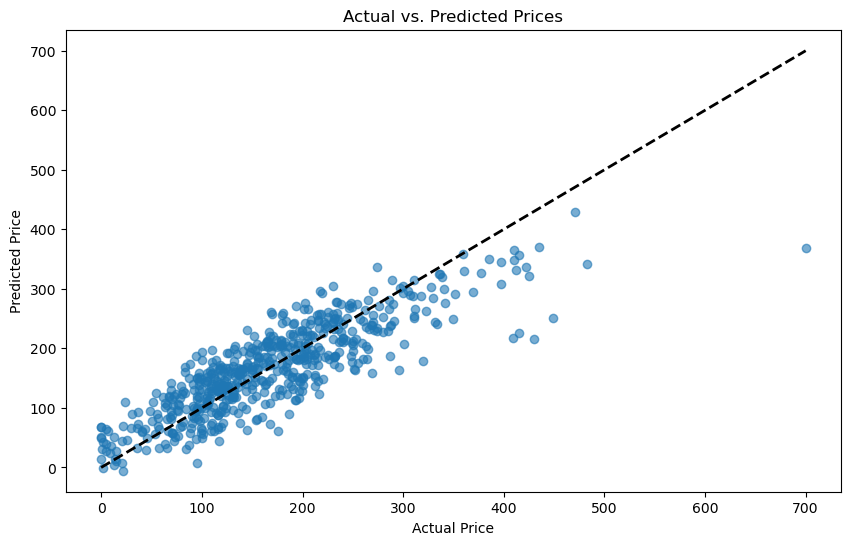

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.show()

In [7]:
df_null_price = df[df['price'].isnull()]
X_null = df_null_price[['Consumptionfromnonren', 'difofspreads']]
predicted_price_null = model.predict(X_null)

df.loc[df['price'].isnull(), 'price'] = predicted_price_null

df_sample_updated = df.head(10)  # Adjust as needed to view specific rows
print(df_sample_updated)

   Year  Month  Day  Hour  IsWeekend  IsBankHoliday  Consumptionfromnonren  \
0  2021      9    1     0          0              0               36420.50   
1  2021      9    1     1          0              0               35541.00   
2  2021      9    1     2          0              0               34522.00   
3  2021      9    1     3          0              0               34793.25   
4  2021      9    1     4          0              0               36074.00   
5  2021      9    1     5          0              0               39970.00   
6  2021      9    1     6          0              0               48025.25   
7  2021      9    1     7          0              0               50987.75   
8  2021      9    1     8          0              0               50522.50   
9  2021      9    1     9          0              0               47251.25   

   difofspreads  Clean_Spark_Spread       price  
0         19.32              -14.79   94.779999  
1         19.32              -14.79   92.

In [8]:
df.to_excel(r'C:\Users\d.sahin\Desktop\denetcitalebi\analizdosyası\predictionresults.xlsx')